In [41]:
 %matplotlib inline
# from matplotlib import style
# style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

In [42]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [43]:
import datetime as dt

In [44]:
# Python SQL toolkit and Object Relational Mapper
# import sqlalchemy
# from sqlalchemy.ext.automap import automap_base
# from sqlalchemy.orm import Session
# from sqlalchemy import create_engine, func, inspect, extract, desc, and_

In [45]:
# Importing HonoluluHI library made for this assignment
from HonoluluHI_Weather import HonoluluHI_WeatherDB
from HonoluluHI_Weather import month_offset

# Reflect Tables into SQLAlchemy ORM

In [46]:
# Creating object to reference the db
weather = HonoluluHI_WeatherDB()

In [47]:
# Reflecting the db
weather.get_table_metadata()



------------
table 'measurement' has the following columns:
------------
name: id   column type: INTEGER
name: station   column type: TEXT
name: date   column type: TEXT
name: prcp   column type: FLOAT
name: tobs   column type: FLOAT


------------
table 'station' has the following columns:
------------
name: id   column type: INTEGER
name: station   column type: TEXT
name: name   column type: TEXT
name: latitude   column type: FLOAT
name: longitude   column type: FLOAT
name: elevation   column type: FLOAT


# Precipitation analysis

In [48]:
# Querying the last year of data, ordering by date, and converting 
# to a dataframe
weather.get_prcp_data_last_yr()

,id,station,date,prcp,tobs
0,2365,USC00519397,2016-08-24,0.08,79.0
1,5092,USC00513117,2016-08-24,2.15,76.0
2,7332,USC00514830,2016-08-24,2.28,80.0
3,8826,USC00517948,2016-08-24,NaN,78.0
4,11852,USC00519523,2016-08-24,1.22,79.0
...,...,...,...,...,...
2218,19549,USC00516128,2017-08-22,0.50,76.0
2219,2724,USC00519397,2017-08-23,0.00,81.0
2220,7635,USC00514830,2017-08-23,0.00,82.0
2221,12187,USC00519523,2017-08-23,0.08,82.0


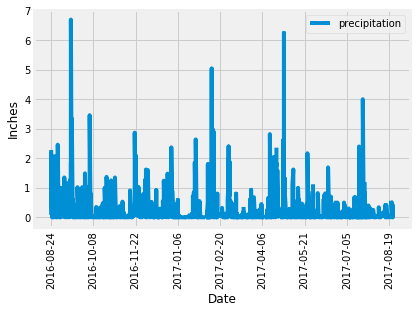

In [49]:
# Ploting the precipitation data retrieved in the previous step
weather.print_prcp_data_last_yr()

#saving plot to Images folder
plt.savefig("Images/Precipitation_chart.png", bbox_inches="tight")

# Station analysis

In [50]:
# Querying the correct number of stations
weather.stations_data("Number of unique stations")

9

In [51]:
# Querying for the most active stations
weather.stations_data()

,name,station,count_id
0,"WAIHEE 837.5, HI US",USC00519281,2772
1,"WAIKIKI 717.2, HI US",USC00519397,2724
2,"KANEOHE 838.1, HI US",USC00513117,2709
3,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,2669
4,"MANOA LYON ARBO 785.2, HI US",USC00516128,2612
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,2202
6,"HONOLULU OBSERVATORY 702.2, HI US",USC00511918,1979
7,"PEARL CITY, HI US",USC00517948,1372
8,"UPPER WAHIAWA 874.3, HI US",USC00518838,511


In [52]:
# Retrieving the most active station
most_active_station = weather.stations_data().loc[0,"name"]
most_active_station

'WAIHEE 837.5, HI US'

In [53]:
# Retrieving the min, max, avg temperatures for the most active station
weather.station_min_avg_max_temp(most_active_station)

,name,t_min,t_avg,t_max
0,"WAIHEE 837.5, HI US",54.0,71.663781,85.0


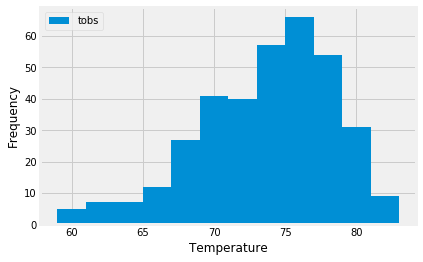

In [54]:
# Plot the histogram of observed temperatures for the most active stations
weather.station_temp_data("WAIHEE 837.5, HI US", show_chart=True)

#saving plot to Images folder
plt.savefig("Images/Temp_hist.png", bbox_inches="tight")

# Optional analysis

## Temperature analysis I

In [55]:
# Retrieving June and December data 

df_June_avg_temp = weather.month_avg_temperatures(6)
df_Dec_avg_temp = weather.month_avg_temperatures(12)
df_avg_temp_Jun_Dec = pd.merge(df_June_avg_temp, df_Dec_avg_temp, on="year")
df_avg_temp_Jun_Dec

,year,AvgT_mth 6,AvgT_mth 12
0,2010,74.925620,70.208511
1,2011,73.938326,70.820628
2,2012,74.000000,71.188073
3,2013,74.599078,71.094017
4,2014,75.027907,69.896861
5,2015,74.990148,73.423913
6,2016,75.175258,71.130000


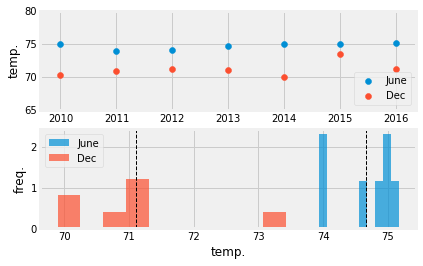

In [56]:
# Plotting the June and December data

# Scatter Plot of Data
fig, ax = plt.subplots(2, 1)
ax[0].scatter(df_avg_temp_Jun_Dec['year'], df_avg_temp_Jun_Dec['AvgT_mth 6'], label="June")
ax[0].scatter(df_avg_temp_Jun_Dec['year'], df_avg_temp_Jun_Dec['AvgT_mth 12'], label="Dec")
ax[0].set_xlabel("year")
ax[0].set_ylabel("temp.")
ax[0].set_ylim(65,80)
ax[0].legend(loc="lower right")

# Histogram Plot of Data
ax[1].hist(df_avg_temp_Jun_Dec['AvgT_mth 6'], 10, density=True, alpha=0.7, label="June")
ax[1].hist(df_avg_temp_Jun_Dec['AvgT_mth 12'], 10, density=True, alpha=0.7, label="Dec")
ax[1].axvline(df_avg_temp_Jun_Dec['AvgT_mth 6'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1].axvline(df_avg_temp_Jun_Dec['AvgT_mth 12'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1].set_xlabel("temp.")
ax[1].set_ylabel("freq.")
ax[1].legend()  

#saving plot to Images folder
plt.savefig("Images/Ttest.png", bbox_inches="tight")

In [57]:
# two sided T-test without assumption of equal variances  
stats.ttest_ind(df_avg_temp_Jun_Dec['AvgT_mth 6'], df_avg_temp_Jun_Dec['AvgT_mth 12'], equal_var=False)

Ttest_indResult(statistic=7.570096659210406, pvalue=5.3283128862831936e-05)

## Temperature analysis II

In [58]:
# Defining start and end date for the vacation
start_vacation_date = '2018-06-01'
end_vacation_date = '2018-06-07'

In [59]:
# Calculating the min, max, avg  temp for a year prior to vacation
period_before_months = 12
period_start = month_offset(-period_before_months, start_vacation_date)
period_end = month_offset(-period_before_months, end_vacation_date)

temp_of_interest = weather.calc_temps(period_start, period_end)
temp_of_interest

[(74.0, 77.84444444444445, 81.0)]

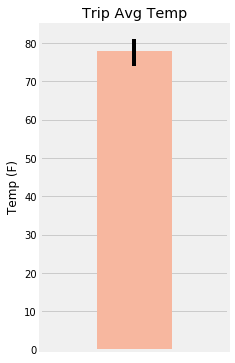

In [60]:
# Plotting the data from a year prior to vacation
x = 0
y = temp_of_interest[0][1]
upper_error = temp_of_interest[0][2] - temp_of_interest[0][1]
lower_error = temp_of_interest[0][1] - temp_of_interest[0][0]

fig, ax = plt.subplots(1, 1, figsize=(3,6))
ax.bar(x, y, color="#F7B79F")
ax.set_title("Trip Avg Temp")
ax.set_xticks([])
ax.set_ylabel("Temp (F)")
ax.set_xlim(-1,1)
ax.errorbar(x, y, yerr=[[lower_error],[upper_error]], color="black") 

#saving plot to Images folder
plt.savefig("Images/TripTemp_bar.png", bbox_inches="tight")

## Daily Rainfall Average

In [61]:
# Calculating rainfall a year prior to vacation date
weather.get_rainfall_data(period_start, period_end)

,name,elevation,latitude,longitude,Total_Rainfall
0,"MANOA LYON ARBO 785.2, HI US",152.4,21.33310,-157.80250,0.84
1,"KANEOHE 838.1, HI US",14.6,21.42340,-157.80150,0.48
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US",7.0,21.52130,-157.83740,0.38
3,"WAIHEE 837.5, HI US",32.9,21.45167,-157.84889,0.35
4,"WAIMANALO EXPERIMENTAL FARM, HI US",19.5,21.33556,-157.71139,0.15
5,"WAIKIKI 717.2, HI US",3.0,21.27160,-157.81680,0.02
6,"PEARL CITY, HI US",11.9,21.39340,-157.97510,NaN


In [66]:
# Calculating the daily normals for a specific day of the month
weather.daily_normals("06-01")

[(64.0, 74.6140350877193, 81.0)]

In [63]:
# Calculating the daily normals for the vacation periods

# Use the start and end date to create a range of dates
lst_vacation_dmy = pd.date_range(start=start_vacation_date, end=end_vacation_date)

# Stip off the year and save a list of %m-%d strings
lst_vacation_days = [dt.datetime.strftime(x, '%m-%d') for x in lst_vacation_dmy]

# Loop through the list of %m-%d strings and calculate the normals for each date
lst_daily_normals = [[weather.daily_normals(x)[0][0], \
                      weather.daily_normals(x)[0][1], \
                      weather.daily_normals(x)[0][2]] \
                     for x in lst_vacation_days]

lst_daily_normals = np.transpose(lst_daily_normals)
lst_daily_normals

array([[64.        , 65.        , 65.        , 65.        , 68.        ,
        70.        , 68.        ],
       [74.61403509, 74.4       , 74.03448276, 73.81818182, 74.85454545,
        75.1754386 , 75.07142857],
       [81.        , 81.        , 80.        , 81.        , 81.        ,
        80.        , 81.        ]])

In [64]:
#Loading the list of daily normals into a database

df_est_temp_for_vacation = \
    pd.DataFrame(zip(lst_vacation_dmy,*lst_daily_normals))
df_est_temp_for_vacation = \
    df_est_temp_for_vacation.rename(columns={
        0: "Day",
        1: "Tmin",
        2: "Tavg",
        3: "Tmax"})
df_est_temp_for_vacation = df_est_temp_for_vacation.set_index("Day")
df_est_temp_for_vacation

,Tmin,Tavg,Tmax
Day,,,
2018-06-01,64.0,74.614035,81.0
2018-06-02,65.0,74.400000,81.0
2018-06-03,65.0,74.034483,80.0
2018-06-04,65.0,73.818182,81.0
2018-06-05,68.0,74.854545,81.0
2018-06-06,70.0,75.175439,80.0
2018-06-07,68.0,75.071429,81.0


<Figure size 1152x1152 with 0 Axes>

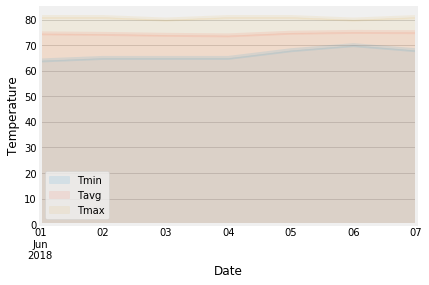

In [65]:
# Plotting the daily normals

fig = plt.figure(figsize=(16,16))
ax = df_est_temp_for_vacation.plot(kind="area", stacked=False, alpha=0.1)
ax.set_xlabel("Date")
ax.set_ylabel("Temperature")

#saving plot to Images folder
plt.savefig("Images/WeatherRainfall_area.png", bbox_inches="tight")